> Trabajo: "Creacion del mapa topologico # 1"  
> Autor: Sergio Jacobo Zavaleta

In [1]:
from robots_moviles.topology_library import TopologicalMapProcessor, LinearTopologyOptimizer, GraphIO
import os
from pathlib import Path

/home/ueki/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### Parametros

In [2]:
BASE_DIR = Path(os.getcwd())
MAP_DIR = BASE_DIR.parent / 'maps' / 'escenario_1.yaml'
RESULT_DIR = 'results/topologico/optimized'
MAP_NUMBER = '1'
GRAPH_DIR = f"{RESULT_DIR}/grafo_optimizado_{MAP_NUMBER}.json.gz"
GRAPH_IMAGE_DIR = f"{RESULT_DIR}/mapa_grafo_optimized_escenario_{MAP_NUMBER}.png"
REPORT_DETAILED_DIR = f"{RESULT_DIR}/grafo_optimizado_detallado_escenario_{MAP_NUMBER}.csv"
REPORT_SIMPLE_DIR = f"{RESULT_DIR}/grafo_optimizado_simple_escenario_{MAP_NUMBER}.csv"
REPORT_SUMMARY_DIR = f"{RESULT_DIR}/grafo_optimizado_resumen_escenario_{MAP_NUMBER}"

#### Crecion del mapa topologico

Primer píxel blanco (esquina casa) en píxeles: (182, 130)


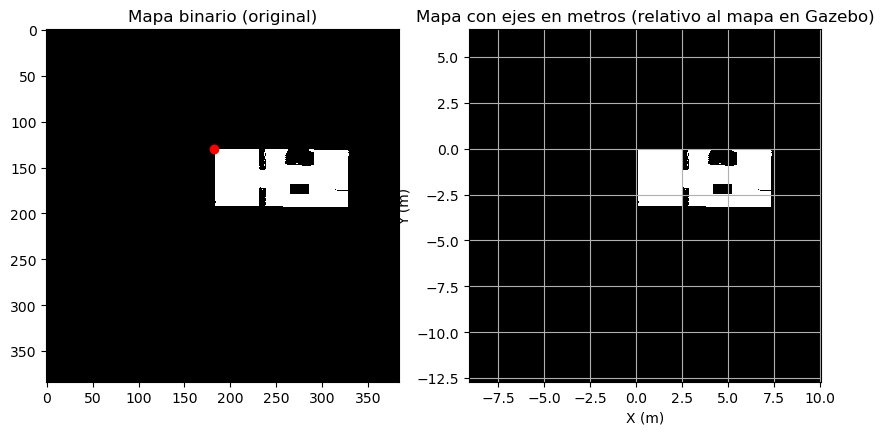

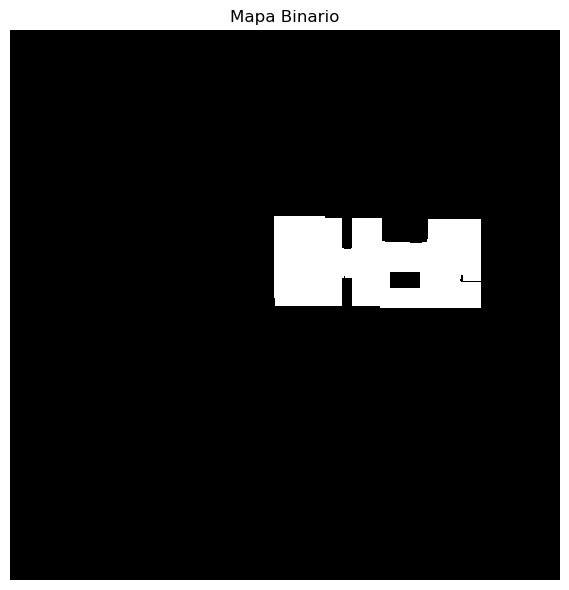

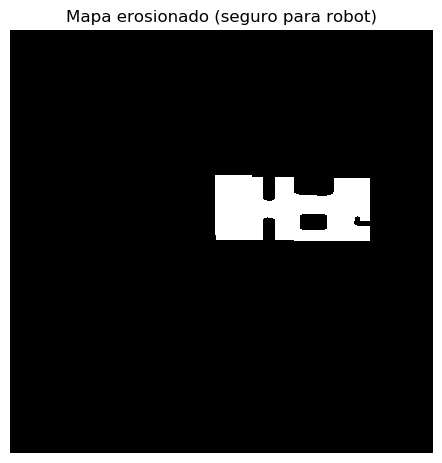

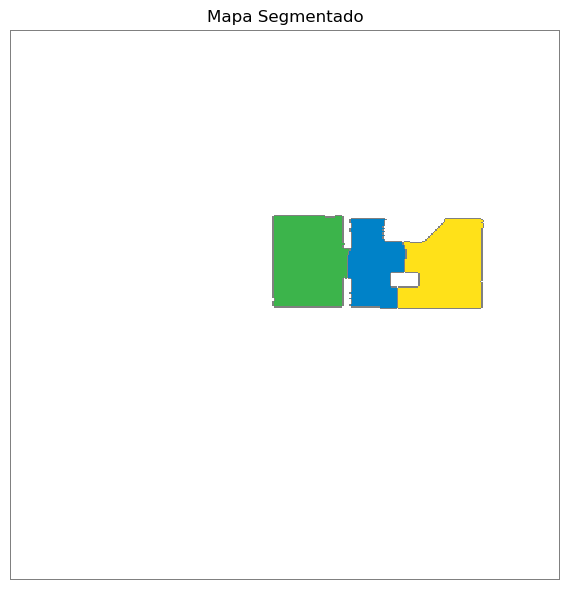

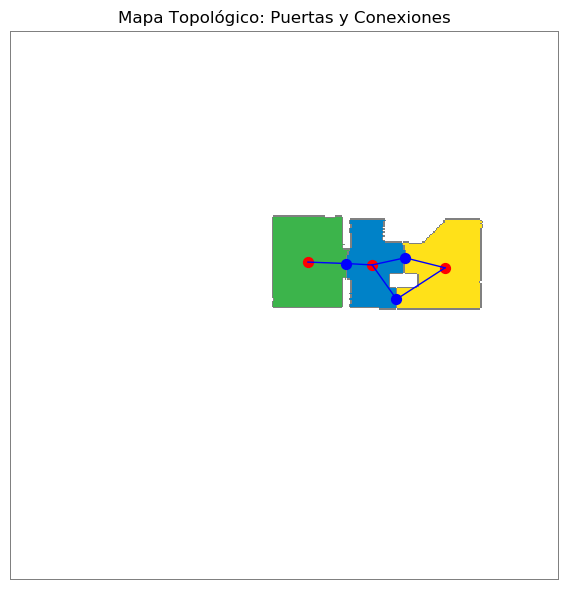

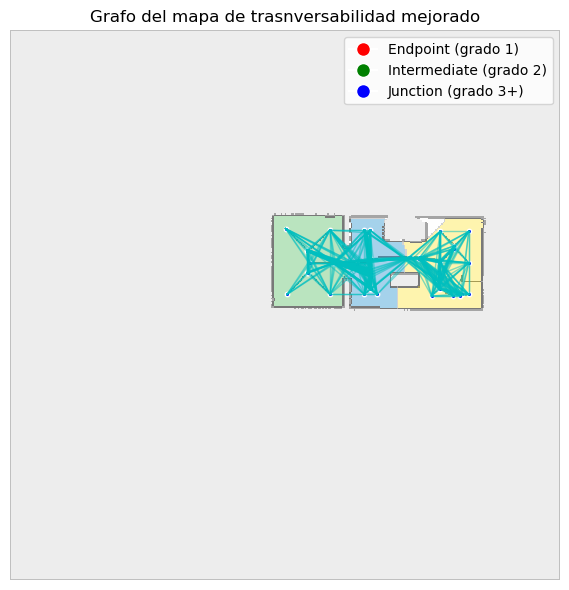

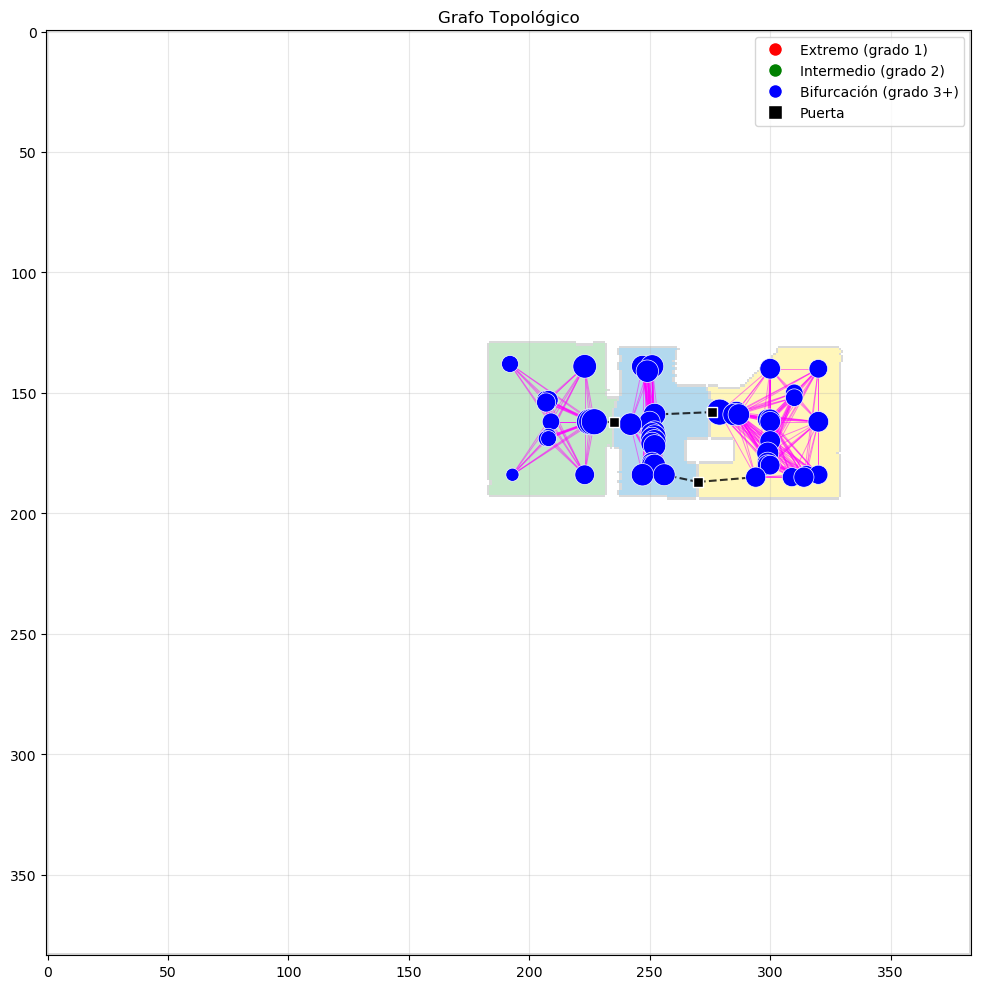

In [3]:
# Configuración de parámetros
config = TopologicalMapProcessor.Config()
# load_and_process_map
config.morph_open_kernel = (7, 7)  # Kernel más grande para menos ruido
config.erode_kernel = (3, 3)  # Erosión más fuerte
config.erode_iterations = 0  # Más erosión para menos ruido
# Erosión considerando el tamaño del robot
config.robot_diametro = 0.3         # Diámetro del robot en metros
config.dilate_robot_iterations = 1   # Iteraciones para dilatación del robot
# segment_map
config.watershed_threshold = 0.5  # Umbral más alto para menos segmentos
config.dilate_iterations = 5  # Menos dilatación para menos segmentos
# extract_voronoi_nodes
config.skeleton_erode_kernel = (13, 13)  # Esqueleto más grueso
# is curvature point
config.curvature_threshold = 0.7  # Umbral de curvatura más alto
# add_strategic_nodes
config.strategic_node_step = 15  # Paso más pequeño para nodos estratégicos
# are nodes connected by skeleton
config.max_gap = 25  # Mayor tolerancia a huecos si existe ruido en el esqueleto
# has direct connection skeleton
config.max_gap_door = 30  # Mayor tolerancia a huecos para puertas que nodos
# build_topological_graph
config.door_connection_threshold = 200  # Menor distancia para conectar puertas
# visualize_sleleton_graph
config.skeleton_node_size = 10  # Nodos más grandes
config.skeleton_line_width = 1  # Líneas más gruesas
config.skeleton_node_size = 10  # Nodos más grandes
# visualize_graph
config.graph_node_size_base = 10  # Tamaño base de nodos más grande
config.graph_node_size_factor = 10 # Factor de tamaño por grado
config.door_node_size = 50  # Tamaño de nodos puerta más grande

# Crear instancia topologica
processor = TopologicalMapProcessor(MAP_DIR,config=config)

# Procesamiento completo
processor.load_and_process_map(f"{RESULT_DIR}/mapa_binario_escenario_{MAP_NUMBER}.png")
processor.segment_map(f"{RESULT_DIR}/mapa_segmentado_escenario_{MAP_NUMBER}.png")
processor.extract_topological_info(f"{RESULT_DIR}/mapa_topologico_escenario_{MAP_NUMBER}.png")
processor.extract_voronoi_nodes(f"{RESULT_DIR}/mapa_transversabilidad_escenario_{MAP_NUMBER}.png")
processor.build_topological_graph()

# Resultados
processor.visualize_graph(f"{RESULT_DIR}/mapa_grafo_escenario_{MAP_NUMBER}.png")

Mostrar reportes

In [4]:
node_report = processor.generate_detailed_node_report(output_file=REPORT_DETAILED_DIR)
region_summary = processor.generate_region_summary(output_file=REPORT_SUMMARY_DIR)
# node_report = processor.generate_detailed_node_report()
# region_summary = processor.generate_region_summary()

Datos de regiones guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_1_regions_20250511_021135.csv
Datos generales guardados en: results/topologico/optimized/grafo_optimizado_resumen_escenario_1_general_20250511_021135.csv

Estructura del grafo:
Regiones: 3
Puertas: 3
Nodos: 54
Conexiones internas: 442
Conexiones a puertas: 6


In [5]:
print("=== Reporte Detallado de Nodos ===")
print(node_report[node_report["region"] == 2])

=== Reporte Detallado de Nodos ===
   node_id      type    x    y   x_m   y_m region  degree  \
0    R2_N0  junction  192  138  0.50 -0.40      2      14   
1    R2_N1  junction  223  139  2.05 -0.45      2      28   
2    R2_N9  junction  207  153  1.25 -1.15      2      18   
3   R2_N10  junction  208  153  1.30 -1.15      2      18   
4   R2_N11  junction  207  154  1.25 -1.20      2      18   
5   R2_N19  junction  209  162  1.35 -1.60      2      15   
6   R2_N26  junction  208  168  1.30 -1.90      2      12   
7   R2_N28  junction  207  169  1.25 -1.95      2      12   
8   R2_N29  junction  208  169  1.30 -1.95      2      12   
9   R2_N42  junction  193  184  0.55 -2.70      2       8   
10  R2_N43  junction  223  184  2.05 -2.70      2      19   
11  R2_N51  junction  225  162  2.15 -1.60      2      34   
12  R2_N52  junction  226  162  2.20 -1.60      2      35   
13  R2_N53  junction  227  162  2.25 -1.60      2      34   

                                      connected_n

In [6]:
print("\n=== Resumen por Región ===")
print(region_summary)


=== Resumen por Región ===
   region_id  num_nodes  avg_degree  num_endpoints  num_junctions  \
0          2         14   19.785714              0             14   
1          4         18   24.444444              0             18   
2          3         22   20.772727              0             22   

   num_intermediate associated_doors    centroid  
0                 0               D1  (208, 161)  
1                 0       D0, D1, D2  (253, 163)  
2                 0           D0, D2  (304, 165)  


In [7]:
# Después de haber procesado el mapa y generado el esqueleto
simple_report = processor.generate_simple_skeleton_report(output_file=REPORT_SIMPLE_DIR)

# Acceder a los datos
print("=== Nodos del esqueleto ===")
print(simple_report["nodes"][simple_report["nodes"]["region"] == 2])

print("\n=== Conexiones del esqueleto ===")
print(simple_report["connections"][simple_report["connections"]["node1"] == 2])

=== Nodos del esqueleto ===
    node_id    x    y      type  degree  region
0         0  192  138  junction      14       2
1         1  223  139  junction      28       2
9         9  207  153  junction      18       2
10       10  208  153  junction      18       2
11       11  207  154  junction      18       2
19       19  209  162  junction      15       2
20       51  225  162  junction      34       2
21       52  226  162  junction      35       2
22       53  227  162  junction      34       2
29       26  208  168  junction      12       2
31       28  207  169  junction      12       2
32       29  208  169  junction      12       2
45       42  193  184  junction       8       2
46       43  223  184  junction      19       2

=== Conexiones del esqueleto ===
    node1  node2  distance  same_region
42      2      3   4.00 px         True
43      2      6   2.83 px         True
44      2     14  20.62 px         True
45      2     20  23.19 px         True
46      2     23  

#### Grafo optimizado: Lineal

In [8]:
# Uso de la clase LinearTopologyOptimizer
original_graph = processor.graph

# Configuración
config = LinearTopologyOptimizer.Config()
config.keep_doors=True          # Siempre mantener nodos puerta
config.keep_endpoints=True      # Mantener nodos finales
config.min_node_degree=2        # Nodos con grado >= 2
config.connection_radius=30.0   # Radio de conexión ajustado
config.min_path_length=2        # Caminos de al menos 3 nodos
config.merge_aligned_nodes=True # Fusionar nodos alineados
config.alignment_tolerance=10.0 # Tolerancia de 10 grados
config.min_line_length=20.0     # Líneas de al menos 40px
config.max_merge_distance=10.0   # Fusionar nodos a <15px


# Optimización
linear_optimizer = LinearTopologyOptimizer(original_graph, config)
linear_graph = linear_optimizer.optimize()

# Verificación
print(f"Nodos: {len(linear_graph['nodes'])}")
print(f"Conexiones: {len(linear_graph['edges'])}")

Nodos: 22
Conexiones: 26


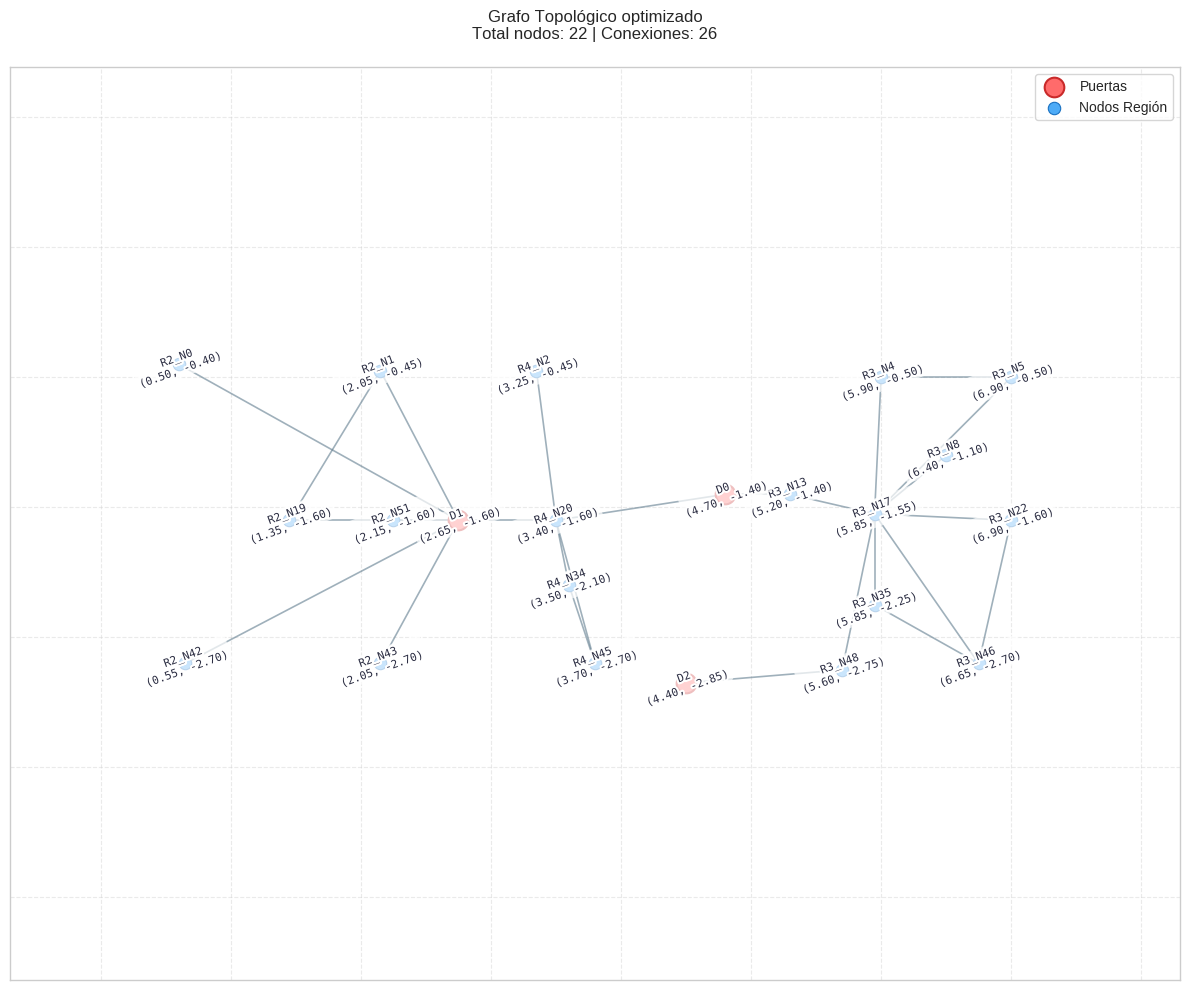

In [ ]:
# Crear instancia de GraphIO
graph_io = GraphIO()
graph_io.visualize_graph(linear_graph,path=GRAPH_IMAGE_DIR)

In [ ]:
# Guardar grafo optimizado
graph_io.save_graph(linear_graph, file_path=GRAPH_DIR)

# Opcional (para máxima compatibilidad con objetos Python)
# graph_io.save_graph_pickle(linear_graph, f"results/topologico/optimized/grafo_optimizado_{MAP_NUMBER}.pkl")